In [45]:
%matplotlib notebook

In [46]:
%matplotlib inline

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time
import sys
import sqlite3


# get just the first year of observations

In [48]:
baseline_db = "baseline_v3.0_10yrs.db"
year1_fname = 'first_year_{}.db'.format(baseline_db.split(".db")[0])

In [49]:
if not os.path.isfile(year1_fname): 
    print("get year 1 observations")
    conn = sqlite3.connect(baseline_db)
    df = pd.read_sql('select * from observations;', conn)
    year1 = df[df["night"]<366]
    conn.close()

    # open up a connection to a new database
    conn = sqlite3.connect(year1_fname)
    year1.to_sql('observations', conn, index=False, if_exists='replace')
    conn.close()

In [50]:
# nside = 256
# nside = 64
nside = 32
s = maf.HealpixSlicer(nside=nside)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


# run some metrics on the baseline and reduced datasets

In [51]:
nside_file = 256
# nside_file = 32
template_timescale = 28
fname = "visit_cut_t-{}d_nside-{}.db".format(template_timescale,nside_file)

opsim_list = [year1_fname]
for t in [28,112,168]:
    opsim_list.append("visit_cut_t-{}d_nside-{}.db".format(t,nside_file))

In [52]:
opsim_list

['first_year_baseline_v3.0_10yrs.db',
 'visit_cut_t-28d_nside-256.db',
 'visit_cut_t-112d_nside-256.db',
 'visit_cut_t-168d_nside-256.db']

# Compare Nvisit

In [53]:
run_dict_visits = {}

for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
    for f in 'ugrizy':
        m = maf.metrics.CountMetric(col='observationStartMJD', metricName='Nvisits')
        constraint = f'filter == "{f}"'
        bdict[f] = maf.MetricBundle(m, s, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_visits[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint filter == "u" for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos']
Found 10136 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos']
Found 15615 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos']
Found 49269 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "i" for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos']
Found 52835 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summ

In [54]:
run_dict_visits.keys()

dict_keys(['first_year_baseline_v3.0_10yrs', 'visit_cut_t-28d_nside-256', 'visit_cut_t-112d_nside-256', 'visit_cut_t-168d_nside-256'])

In [55]:
bdict.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y'])

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


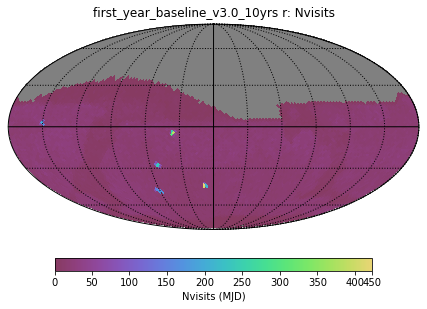

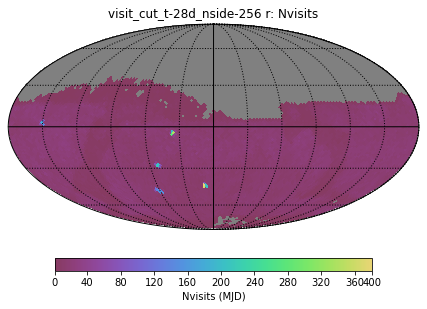

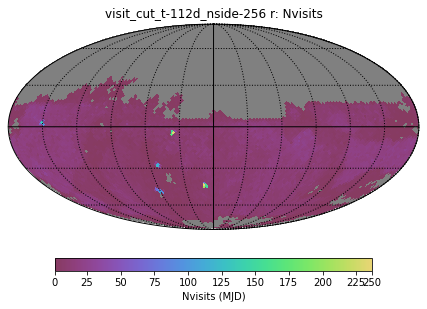

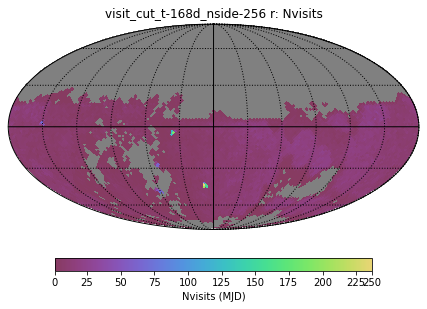

In [56]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        ph.setMetricBundles([bdict[f]])
        ph.plot(plotFunc=maf.HealpixSkyMap())

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 475 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 479 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 290 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 280 bins, returning 200
  warnings.warn(


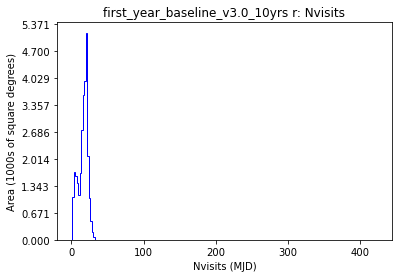

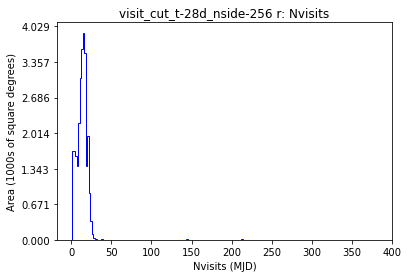

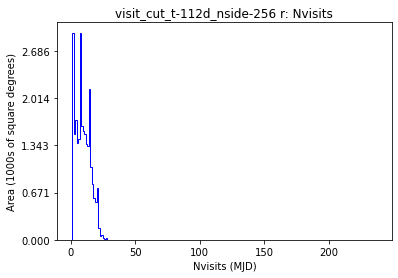

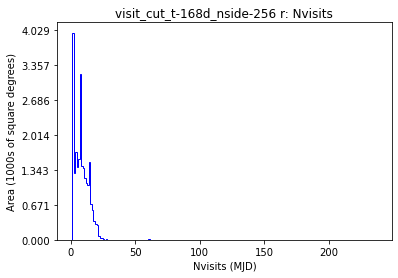

In [57]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        ph.setMetricBundles([bdict[f]])
        ph.plot(plotFunc=maf.HealpixHistogram())

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 475 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 479 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 280 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 290 bins, returning 200
  warnings.warn(


1

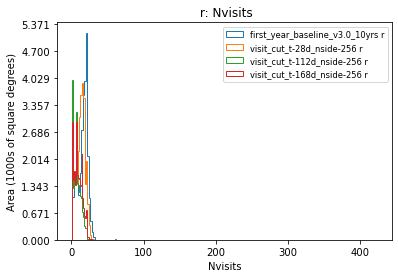

In [58]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

bundles = []
plot_dicts = []

count = 0
for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        bundles.append(bdict[f])
        plot_dicts.append({"label":"{} {}".format(r, f),"color":"C{}".format(count)})
        count+=1
        
ph.setMetricBundles(bundles)
ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts = plot_dicts)

first_year_baseline_v3.0_10yrs r 27888.04924307665
visit_cut_t-28d_nside-256 r 27478.4739442136
visit_cut_t-112d_nside-256 r 25517.883989000315
visit_cut_t-168d_nside-256 r 23073.860894145397


/var/folders/6r/3460lbq91j9402dmmk71v61m0000gt/T/ipykernel_71673/691614900.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:3.0f}'.format(x * pix_area) for x in y_vals])


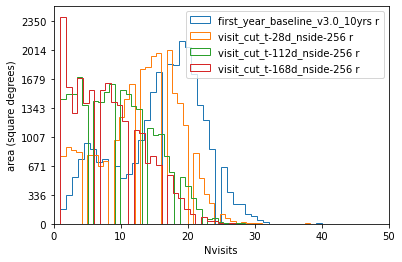

In [59]:
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])
bins = "auto"
# bins = 200
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True) # square degrees

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        bundle = bdict[f]
        
        data = bundle.metricValues
        data = data[~data.mask]
        n,b,p = ax1.hist(data, bins = bins, histtype = "step", label = "{} {}".format(r, f))
        
        # total area
        print(r,f,sum(n)*pix_area)
        

# scale the y axis to get sky area
y_vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.0f}'.format(x * pix_area) for x in y_vals])

ax1.set_xlabel("Nvisits")
ax1.set_ylabel("area (square degrees)")

# ax1.set_yscale("log")
ax1.set_xlim(0,50)

ax1.legend()

plt.show()

# any differences in plots likely to be due to different bins?

# look at the area of sky with pairs of visits

In [60]:
run_dict_pairs = {}

for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
#     for f in 'ugrizy':
    for f in ["all"]:
        m = maf.metrics.pairMetric.PairMetric(mjdCol='observationStartMJD', metricName='Pairs')
        
        if f=="all":
            constraint = None
        else:
            constraint = "filter=={}".format(f) # change this to accept lists?
            
        bdict[f] = maf.MetricBundle(m, s, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_pairs[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with no constraint for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos'].
Found 216378 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-28d_nside-256
Querying table None with no constraint for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos'].
Found 155276 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-112d_nside-256
Querying table None with no constraint for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos'].
Found 99281 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-168d_nside-256
Querying table None with no constraint for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'rotSkyPos'].
Found 77149 visits
Running:  ['all']
Completed metri

In [61]:
bdict

{'all': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x16f2aa4c0>}

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


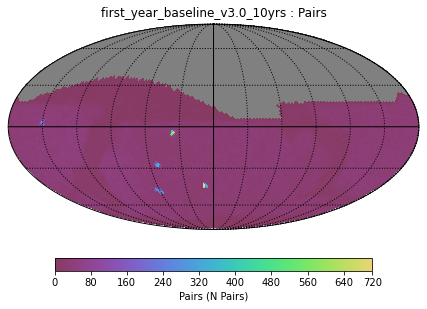

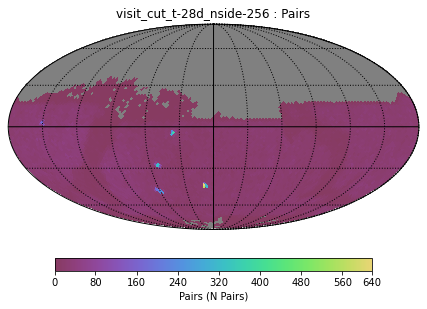

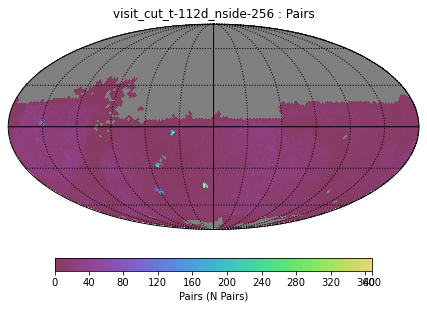

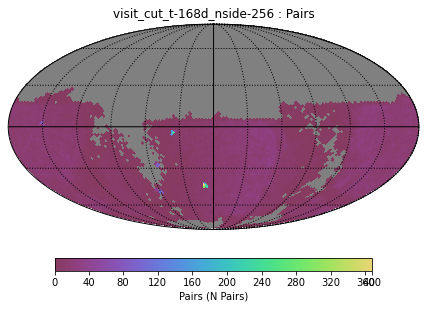

In [62]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

for r in run_dict_pairs.keys():
    bdict = run_dict_pairs[r]
    
    ph.setMetricBundles([bdict["all"]])
    ph.plot(plotFunc=maf.HealpixSkyMap())

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 419 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 505 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 328 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 290 bins, returning 200
  warnings.warn(


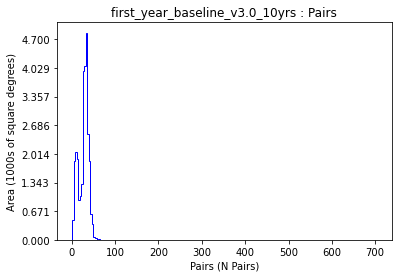

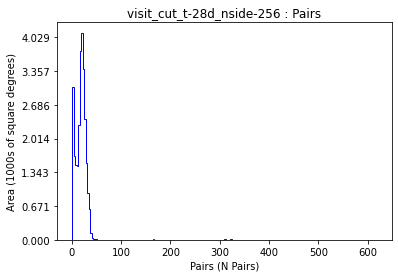

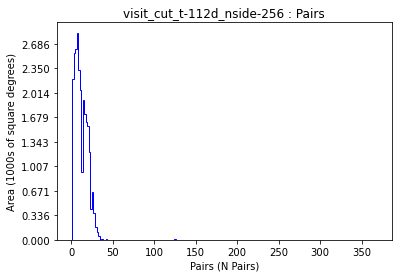

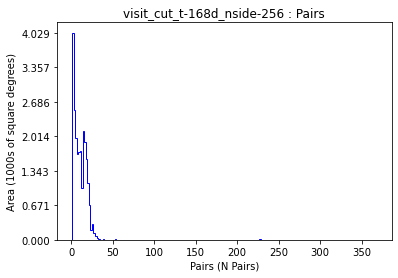

In [63]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

for r in run_dict_pairs.keys():
    bdict = run_dict_pairs[r]
 
    ph.setMetricBundles([bdict["all"]])
    ph.plot(plotFunc=maf.HealpixHistogram())

# plot the cumulative number of visits/pairs as a function of the night

In [101]:
x_data = run_dict_visits["first_year_baseline_v3.0_10yrs"]["u"].metricValues
x_data,len(x_data)

(masked_array(data=[--, --, --, ..., 4.0, 2.0, 1.0],
              mask=[ True,  True,  True, ..., False, False, False],
        fill_value=-1.6375e+30),
 12288)

In [102]:
x_slice = run_dict_visits["first_year_baseline_v3.0_10yrs"]["u"].slicer.slicePoints
x_slice,len(x_slice)

({'sid': array([    0,     1,     2, ..., 12285, 12286, 12287]),
  'ra': array([0.78539816, 2.35619449, 3.92699082, ..., 2.35619449, 3.92699082,
         5.49778714]),
  'dec': array([ 1.54528012,  1.54528012,  1.54528012, ..., -1.54528012,
         -1.54528012, -1.54528012]),
  'nside': 32,
  'gall': array([2.16065435, 2.17001367, 2.13014132, ..., 5.26305008, 5.302247  ,
         5.31160632]),
  'galb': array([ 0.45182552,  0.48693038,  0.49503464, ..., -0.45978504,
         -0.45182552, -0.48693038])},
 6)

In [64]:
nights = np.arange(0, 365, 1)
pixarea = hp.nside2pixarea(nside, degrees=True)
    
run_dict_area = {}

for r in run_dict_pairs.keys():
    bdict = run_dict_visits[r]
    
    area_over_time = {}
    area_per_night = {}
    footprint_area = {}
    
    for f in 'ugrizy':
        counts, bins = np.histogram(bdict[f].metricValues.compressed(), bins=nights)
        area_per_night[f] = counts * pixarea 
        area_over_time[f] = counts.cumsum() * pixarea 
        footprint_area[f] = len(bdict[f].metricValues.compressed()) * pixarea
        
    run_dict_area[r] = {"area":area_over_time,"area_per_night":area_per_night,"footprint":footprint_area}

#     break

In [65]:
nights

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [66]:
counts, bins = np.histogram(bdict[f].metricValues.compressed(), bins=nights)
counts

array([  0, 520, 546, 361, 432, 340, 355, 356, 430, 434, 433, 424, 378,
       329, 261, 197, 113,  82,  64,  40,  19,  12,   8,   5,   2,   1,
         1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   

In [67]:
run_dict_area['first_year_baseline_v3.0_10yrs']["footprint"].keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y'])

In [68]:
# run_dict_area['first_year_baseline_v3.0_10yrs']["area"]["u"]

In [69]:
for r in run_dict_area.keys():
    footprint = run_dict_area[r]["footprint"]
    print(footprint)

{'u': 24446.945297710867, 'g': 27485.18829337529, 'r': 27888.04924307665, 'i': 27958.54990927439, 'z': 27867.906195591582, 'y': 24900.163866124894}
{'u': 15147.571708771138, 'g': 23164.504607828203, 'r': 27478.4739442136, 'i': 27626.189625770767, 'z': 26165.818683103334, 'y': 24037.36999884782}
{'u': 6220.844498305169, 'g': 9497.446889209563, 'r': 25517.883989000315, 'i': 25974.45973199519, 'z': 24739.019486244353, 'y': 23087.289592468776}
{'u': 5139.834283273185, 'g': 8950.227432531883, 'r': 23073.860894145397, 'i': 23026.860450013573, 'z': 21663.847570190635, 'y': 20666.76671967977}


first_year_baseline_v3.0_10yrs u 24446.945297710867 24446.945297710867
first_year_baseline_v3.0_10yrs g 27485.18829337529 27485.18829337529
first_year_baseline_v3.0_10yrs r 27877.977719334114 27888.04924307665
first_year_baseline_v3.0_10yrs i 27948.478385531853 27958.54990927439
first_year_baseline_v3.0_10yrs z 27864.54902101074 27867.906195591582
first_year_baseline_v3.0_10yrs y 24896.80669154405 24900.163866124894


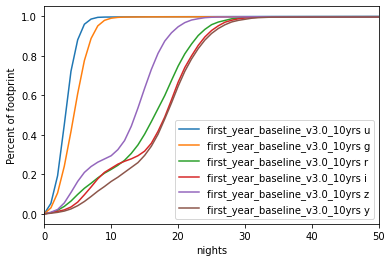

In [70]:
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

for r in run_dict_area.keys():
    for f in 'ugrizy':
        # Show percent of footprint 
        area = run_dict_area[r]["area"][f]
        footprint = run_dict_area[r]["footprint"][f]
        print(r,f,area[-1],footprint)
        ax1.plot(nights[:-1], area / footprint, label="{} {}".format(r,f))
    break
    
ax1.legend()
ax1.set_xlabel("nights")
ax1.set_ylabel('Percent of footprint')

ax1.set_xlim(0,50)

plt.show()

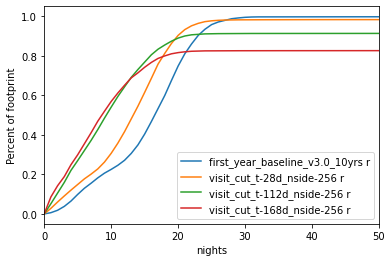

In [71]:
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

for r in run_dict_area.keys():
#     for f in 'ugrizy':
    for f in ["r"]:
        # Show percent of footprint 
        area = run_dict_area[r]["area"][f]
        footprint = run_dict_area["first_year_baseline_v3.0_10yrs"]["footprint"][f] # use the baseline footprint area
        ax1.plot(nights[:-1], area / footprint, label="{} {}".format(r,f))
    
ax1.legend()
ax1.set_xlabel("nights")
ax1.set_ylabel('Percent of footprint')

ax1.set_xlim(0,50)

plt.show()

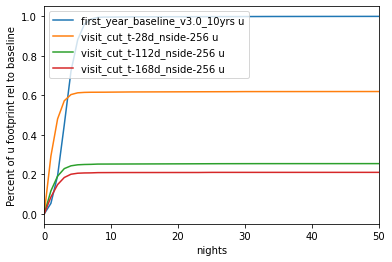

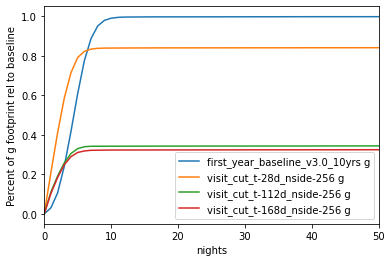

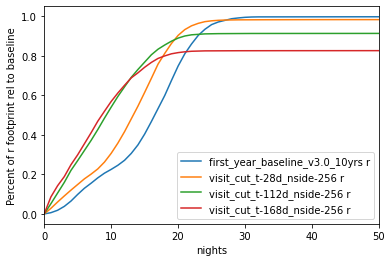

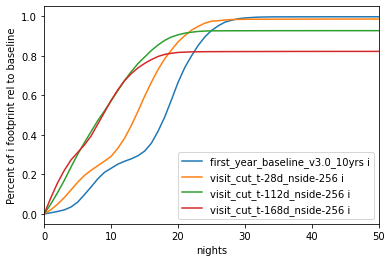

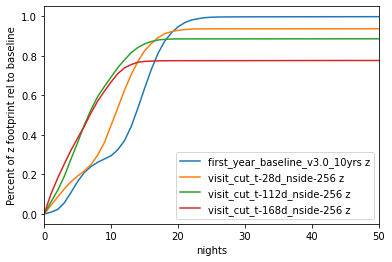

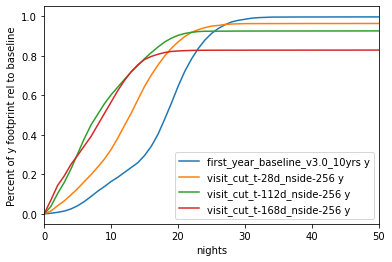

In [72]:
for f in 'ugrizy':

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])
    
    for r in run_dict_area.keys():
        
        # Show percent of footprint 
        area = run_dict_area[r]["area"][f]
        footprint = run_dict_area["first_year_baseline_v3.0_10yrs"]["footprint"][f] # use the baseline footprint area
        ax1.plot(nights[:-1], area / footprint, label="{} {}".format(r,f))
    
    ax1.legend()
    ax1.set_xlabel("nights")
    ax1.set_ylabel('Percent of {} footprint rel to baseline'.format(f))

    ax1.set_xlim(0,50)

    plt.show()

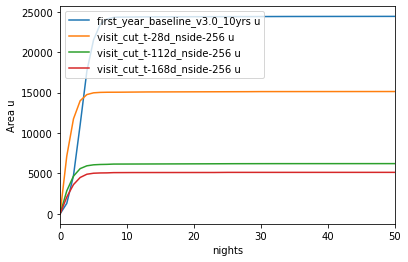

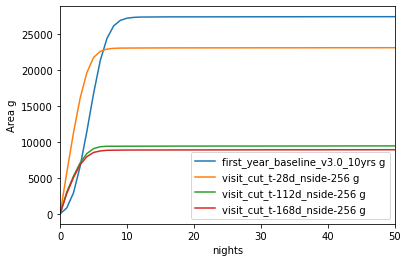

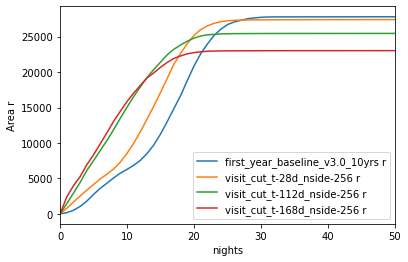

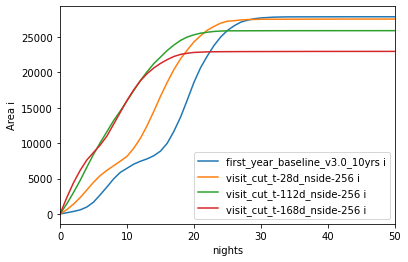

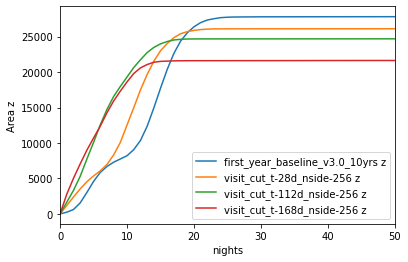

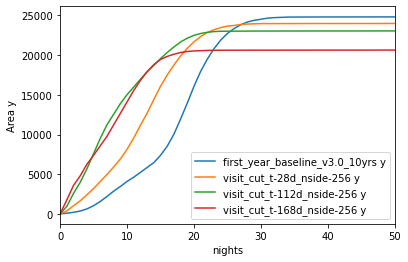

In [73]:
for f in 'ugrizy':

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])
    
    for r in run_dict_area.keys():
        
        area = run_dict_area[r]["area"][f]
        ax1.plot(nights[:-1], area, label="{} {}".format(r,f))
    
    ax1.legend()
    ax1.set_xlabel("nights")
    ax1.set_ylabel('Area {}'.format(f))

    ax1.set_xlim(0,50)

    plt.show()

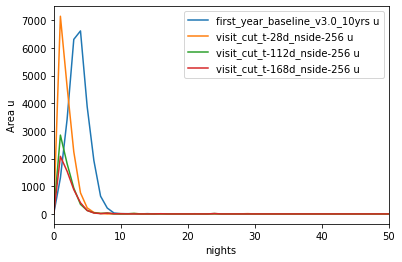

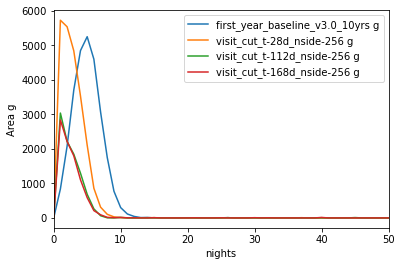

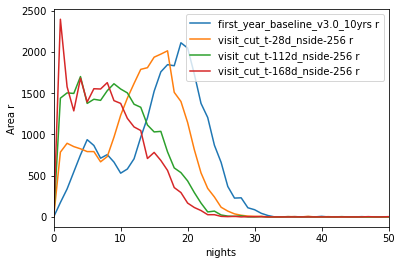

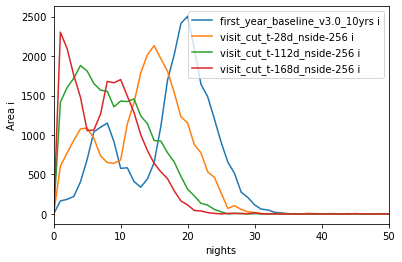

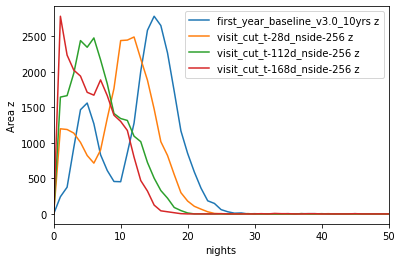

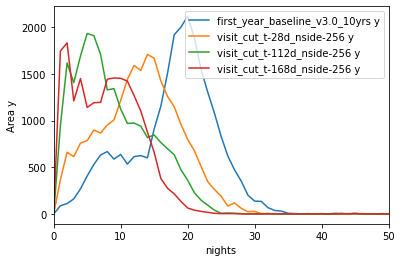

In [74]:
for f in 'ugrizy':

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])
    
    for r in run_dict_area.keys():
        
        area = run_dict_area[r]["area_per_night"][f]
        ax1.plot(nights[:-1], area, label="{} {}".format(r,f))
    
    ax1.legend()
    ax1.set_xlabel("nights")
    ax1.set_ylabel('Area {}'.format(f))

    ax1.set_xlim(0,50)

    plt.show()

In [75]:
# why is area increasing faster than baseline?
# we have done a spatial slicer, not a time slicer!

In [76]:
run_dict_visits_night = {}
nights = np.arange(0, 365, 1)
s = maf.OneDSlicer(sliceColName="night", bins = nights)
    
for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
    for f in 'ugrizy':
#         m = maf.metrics.NVisitsPerNightMetric(nightCol='night', metricName='Nvisits_per_night')
        m = maf.metrics.CountMetric(col="night", metricName='Count')
        constraint = f'filter == "{f}"'
        bdict[f] = maf.MetricBundle(m, s, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_visits_night[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint filter == "u" for columns ['night']
Found 10136 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 15615 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 49269 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "i" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 52835 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" for columns ['night']
Found 48790 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']
Found 39733 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-28d_nside-256
Querying table None with constraint filter == "u" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 3244 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 7726 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 39735 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "i" for columns ['night']
Found 41038 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" for columns ['night']
Found 33843 visits
Running:  ['y']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']
Found 29690 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-112d_nside-256
Querying table None with constraint filter == "u" for columns ['night']
Found 1395 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 3033 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 26720 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "i" for columns ['night']
Found 26121 vis

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 22486 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']
Found 19526 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-168d_nside-256
Querying table None with constraint filter == "u" for columns ['night']
Found 1202 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 2739 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 20772 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "i" fo

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

In [77]:
# run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].metricValues.filled()
run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues.filled()

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 165., 131., 161.,  61.,
        57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 185., 120., 153., 156., 189.,
       122., 130.,  58., 152., 152., 165., 174.,  86., 113., 180.,  52.,
        70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 176., 148., 170.,  94., 178., 130., 272.,   0.,   0.,
         0., 146.,  24., 142., 161.,  43., 220., 138., 110.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 306.,  73.,
        98., 212., 168.,  49., 164., 113., 164., 153., 130., 225., 238.,
       135., 184., 159., 156., 200.,  98.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 173., 189., 285., 209., 280.,
         0., 196.,  72.,   0., 257., 253., 307., 25

In [78]:
# x = run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].metricValues
x = run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues
x_data = x.data
x_mask = x.mask
len(x_data[x_mask])

205

In [79]:
len(x_data[~x_mask])

159

In [80]:
# y = run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].slicer.slicePoints["sid"]
y = run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].slicer.slicePoints["sid"]

In [81]:
len(x),len(y)

(364, 364)

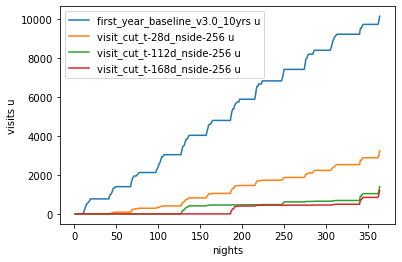

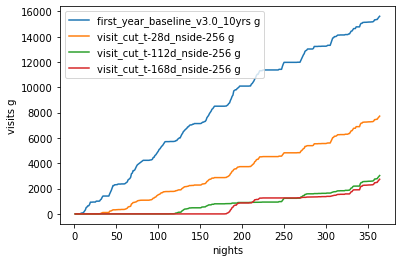

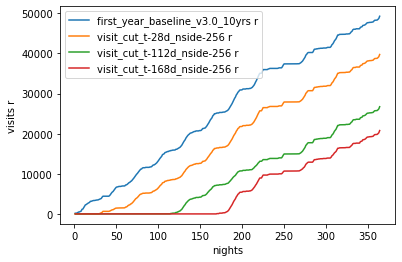

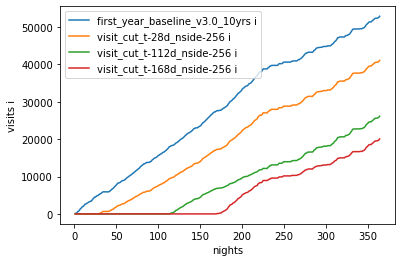

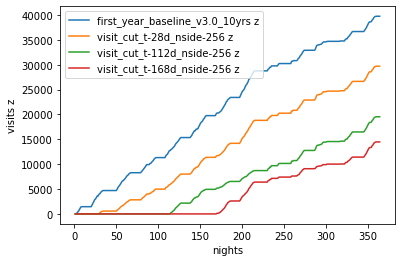

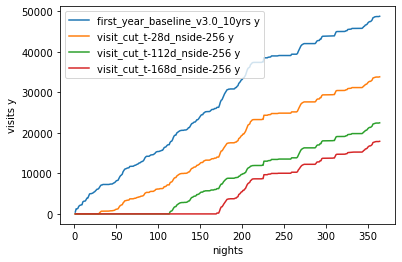

In [82]:
for f in 'ugrizy':

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])
    
    for r in run_dict_visits_night.keys():
        
#         y = run_dict_visits_night[r][f].metricValues.data
        y = run_dict_visits_night[r][f].metricValues.filled()
        x = run_dict_visits_night[r][f].slicer.slicePoints["bins"][1:]
#         ax1.plot(x, y, label="{} {}".format(r,f))
        ax1.plot(x, y.cumsum(), label="{} {}".format(r,f))
    
    ax1.legend()
    ax1.set_xlabel("nights")
    ax1.set_ylabel('visits {}'.format(f))

#     ax1.set_xlim(0,50)
#     ax1.set_ylim(0,50000)

    plt.show()

1

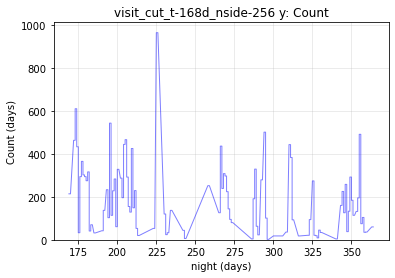

In [83]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)
ph.setMetricBundles([bdict[f]])
ph.plot(plotFunc=maf.OneDBinnedData())

In [88]:
# Check discovery of solar system objects: DiscoveryMetric
# but this only works for a given orbit?